In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

from planimeter import planimetersolve, planimeterplot

This is the code for generating the gif `star.gif`

# Example 4: Star, start at center

In [2]:
Ntag=5

R=1
r=0.4
angles=np.linspace(0, 2*np.pi, 2*Ntag+1)
Rs=[r,R]*Ntag+[r]
xs=Rs*np.cos(angles)
ys=Rs*np.sin(angles)

xs=np.concatenate(([0], xs, [0]))
ys=np.concatenate(([0], ys, [0]))

ts= np.arange(0,2*Ntag+3)


x=lambda t: np.interp(t, ts,xs)
y=lambda t: np.interp(t, ts,ys)

def dx(t):
    for s in range(2*Ntag+2):
        if t>=s and t<s+1:
            return xs[s+1]-xs[s]
    if t==2*Ntag+1:
        return xs[-1]-xs[-2]
    return np.nan
def dy(t):
    for s in range(2*Ntag+2):
        if t>=s and t<s+1:
            return ys[s+1]-ys[s]
    if t==2*Ntag+1:
        return ys[-1]-ys[-2]
    return np.nan


l=5

In [3]:
X,Y,TH=planimetersolve(x,y,dx,dy,[ts[0], ts[-1]], 0, l, 250)

<IPython.core.display.Javascript object>


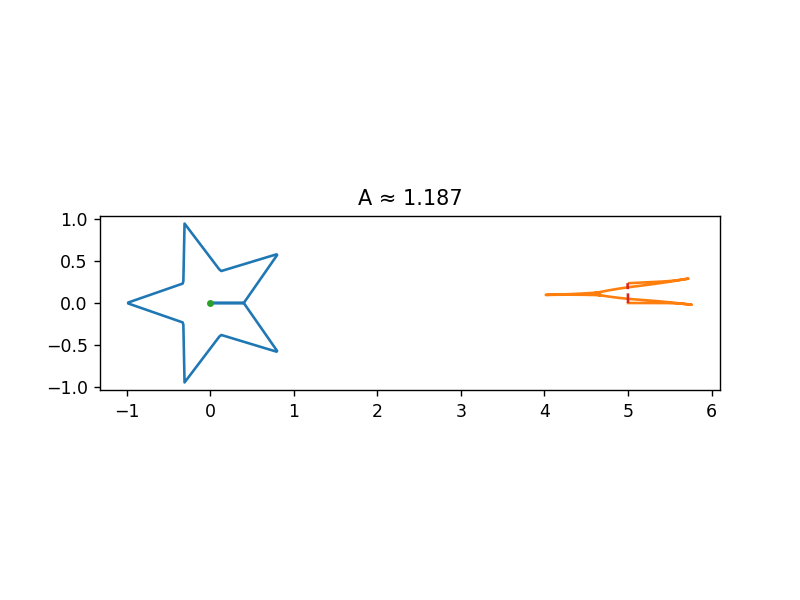

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:title={'center':'A ≈ 1.187'}>)

In [4]:
planimeterplot(X,Y,TH,l)

In [5]:
plt.close()

<IPython.core.display.Javascript object>


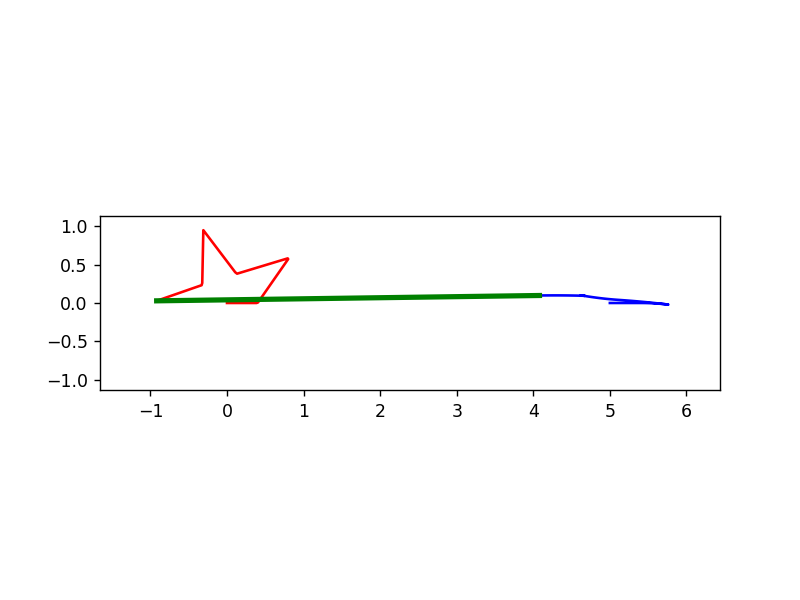

In [6]:
XX=X+l*np.cos(TH)
YY=Y+l*np.sin(TH)

N=X.shape[0]
xmax=np.max([X,XX])
ymax=np.max([Y,YY])
xmin=np.min([X,XX])
ymin=np.min([Y,YY])

xran=xmax-xmin
yran=ymax-ymin

xmax+=0.1*xran
xmin-=0.1*xran
ymax+=0.1*yran
ymin-=0.1*yran


fig, ax = plt.subplots()
lnp, = ax.plot([], [], 'r')
lnch, = ax.plot([], [], 'b')
lnpm, = ax.plot([],[], '-g', markersize=3, linewidth=3)    

mx=np.max([X,XX])
def init():
    ax.set_aspect('equal')
    ax.set(xlim=(xmin,xmax), ylim=(ymin,ymax))

    return lnp,

def update(frame):
    xdata=X[:frame+1]
    ydata=Y[:frame+1]
    xxdata=XX[:frame+1]
    yydata=YY[:frame+1]
    lnp.set_data(xdata, ydata)
    lnch.set_data(xxdata, yydata)
    lnpm.set_data([X[frame], XX[frame]], [Y[frame], YY[frame]]) 
    return lnp,lnch,lnpm,


ani = FuncAnimation(fig, update, frames=N,
                    init_func=init, blit=True, repeat=True, interval=10, repeat_delay=250)
plt.show()

In [7]:
ani.save('star.gif', writer='Pillow', fps=100)

MovieWriter Pillow unavailable; using Pillow instead.
